In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

data = pd.read_csv('data/listings.csv')

# data.columns

In [2]:
data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


In [3]:
data_cleaned = data
# Some columns are shifted by an excessive comma. We shifted these columns by looking for errors in 'host_since'.
shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]
# shifted = shifted.shift(periods=-1, axis=1)
shifted['host_since']


# ******************************************************************************************************************
for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + " ****** " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]


# ******************************************************************************************************************


# data_cleaned.append(shifted)

data_cleaned = pd.concat([data_cleaned, shifted])

# For now we don't use this shifted data because we lose important data. We just drop the wrong records.
# We drop the last column as it's a useless column created by the excessive comma.
data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

data_cleaned

C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


In [4]:

data_cleaned['host_since'] = np.datetime64('today') - pd.to_datetime(data_cleaned['host_since'])
data_cleaned['host_since'] = data_cleaned['host_since'].astype(str).str.replace(' days', '').astype(int)
data_cleaned['host_since'].dtype


dtype('int32')

In [5]:
data_cleaned['host_since'].dtype

dtype('int32')

In [6]:
# Because of the shift, the types of some values isn't right anymore

data_cleaned['longitude'] = data_cleaned['longitude'].astype(float)
data_cleaned['latitude'] = data_cleaned['latitude'].astype(float)


In [7]:
# Change t (true) and f (false) to 1 and 0
data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].replace('t', 1).replace('f', 0)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].replace('t', 1).replace('f', 0)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].replace('t', 1).replace('f', 0)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].replace('t', 1).replace('f', 0)


In [8]:
# The center of Ghent lies at 51.0544707, 3.7236719 (https://www.coordinatenbepalen.nl/coordinates/107915-gent-centrum)
# We calculate de distance of each listing to the center
from math import radians, cos, sin, asin, sqrt

ghent_lat = 51.0544707
ghent_long = 3.7236719


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in data_cleaned.iterrows():
    data_cleaned.loc[index, 'distance_to_center'] = haversine(ghent_long, ghent_lat, row['longitude'], row['latitude'])

df = data_cleaned.drop(["latitude", "longitude"], axis=1)
# latitude = data_cleaned['latitude'].to_numpy()
# longitude = data_cleaned['longitude'].to_numpy()
# # data_cleaned['distance_to_center'] = math.sqrt((data_cleaned['latitude'] - ghent_lat)**2 + (data_cleaned['longitude'] - ghent_lat)**2)
# distance = np.sqrt((latitude - ghent_lat)**2 + (longitude - ghent_long)**2)
# distance = pd.DataFrame(distance)

# # distance = distance.rename(columns={'0': 'distance_to_center'})
# data_cleaned['distance_to_center'] = distance



In [9]:
# NaN is set to 0 because there is no separate place to sleep, but we assume there is at least one place to sleep. 
# We investigated the data (see below) and discovered it's always a studio, lounge or a condo but you have to sleep in a general space.
# data_cleaned[data_cleaned['bedrooms'].isna()]
# data_cleaned['bedrooms'] = data_cleaned['bedrooms'].fillna(0)


data_cleaned['bedrooms'] = data_cleaned['bedrooms'].replace(np.NAN, 0).astype(int)
data_cleaned['beds'] = data_cleaned['beds'].replace(np.NAN, 0).astype(int)

# data_cleaned['bedrooms'].sort_values().to_numpy()    


In [10]:
# accomodates in orde
data_cleaned['accommodates'] = data_cleaned['accommodates'].astype(int)
# data_cleaned['accommodates'].sort_values().to_numpy()

In [11]:
# The data in 'room_type' is one of four possibilities: Entire home/apt, Private room, Shared room or Hotel. 
# This data isn't easy to work with so what we could do is replace them with a number between 0 and 3.
# The problem with this is that the model might assume some kind of order or hierarchy. 
# One-hot encoding is a better solution to this problem.

a = pd.get_dummies(data_cleaned['room_type'], prefix="room_type")

frames = [data_cleaned, a]
data_cleaned = pd.concat(frames, axis=1)


data_cleaned.drop(['room_type'], inplace=True, axis=1)

data_cleaned.rename(
    columns={
        "room_type_Private room": "room_type_private", 
        "room_type_Entire home/apt": "room_type_entire", 
        "room_type_Hotel room": "room_type_hotel", 
        "room_type_Shared room": "room_type_shared"}, 
        inplace=True
    )

# data_cleaned


In [12]:
data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\bavop\AppData\Local\Temp/ipykernel_19312/2195279143.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


In [13]:
#availability -> volledig correct
data_cleaned['availability_365'].to_numpy()

array([326, 276, 124, 358, 326, 201, 365, 77, 166, 176, 212, 346, 337,
       152, 98, 181, 275, 179, 240, 331, 311, 321, 0, 170, 275, 150, 70,
       45, 339, 13, 363, 288, 263, 256, 48, 288, 131, 4, 328, 138, 342, 0,
       347, 142, 140, 156, 129, 114, 22, 31, 166, 159, 234, 321, 364, 121,
       129, 177, 263, 252, 159, 196, 364, 0, 9, 0, 180, 307, 0, 331, 87,
       122, 0, 321, 89, 179, 165, 284, 335, 0, 222, 349, 140, 350, 110,
       353, 170, 343, 352, 308, 340, 34, 353, 256, 287, 193, 93, 165, 214,
       167, 330, 25, 327, 107, 26, 186, 329, 169, 179, 179, 225, 349, 49,
       346, 324, 342, 75, 329, 329, 133, 325, 320, 318, 257, 27, 299, 6,
       196, 340, 70, 194, 335, 90, 336, 90, 362, 73, 49, 228, 10, 99, 142,
       0, 162, 196, 358, 179, 196, 359, 364, 309, 61, 346, 284, 140, 58,
       75, 107, 303, 181, 338, 339, 76, 13, 27, 187, 18, 88, 318, 164,
       319, 293, 326, 363, 335, 286, 352, 92, 179, 318, 18, 17, 334, 37,
       0, 33, 31, 196, 142, 169, 99, 286, 41, 1

In [14]:
#number_of_reviews is oké
#number_of_reviews_ltm oké
#number_of_reviews_l30d oké
#review_scores zien er oké uit


#deze heeft NAN's -> maar sommige 
#data_cleaned.loc[data_cleaned['bathrooms_text']=='0 shared baths']['description']

#data_cleaned['bathrooms_text'].unique()

test=[]

for x in data_cleaned['bathrooms_text'].str.findall('\d[\.]*[\d]*'):
  if len(x)!=0:
    test.append(float(x[0]))
  else:
    test.append(float(0))

data_cleaned['bathrooms'] = test

data_cleaned.loc[:,['bathrooms','bathrooms_text']]

# data_cleaned['bathrooms'].sort_values()

,bathrooms,bathrooms_text
0,1.5,1.5 baths
1,1.0,1 bath
2,1.0,1 bath
3,1.5,1.5 baths
4,2.5,2.5 baths
...,...,...
515,1.0,1 bath
516,1.0,1 bath
537,1.0,1 shared bath
841,1.0,1 private bath


In [15]:
# set columns to correct type

# data_cleaned['host_since'] = pd.to_datetime(data_cleaned['host_since'])
data_cleaned['host_listings_count'] = data_cleaned['host_listings_count'].astype(int)

data_cleaned['availability_30'] = data_cleaned['availability_30'].astype(int)
data_cleaned['availability_60'] = data_cleaned['availability_60'].astype(int)
data_cleaned['availability_90'] = data_cleaned['availability_90'].astype(int)
data_cleaned['availability_365'] = data_cleaned['availability_365'].astype(int)

data_cleaned['review_scores_rating'] = data_cleaned['review_scores_rating'].astype(float)
data_cleaned['number_of_reviews'] = data_cleaned['number_of_reviews'].astype(float)

data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].astype(int)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].astype(int)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].astype(int)
data_cleaned['number_of_reviews_ltm'] = data_cleaned['number_of_reviews_ltm'].astype(int)
data_cleaned['number_of_reviews_l30d'] = data_cleaned['number_of_reviews_l30d'].astype(int)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].astype(int)


In [16]:
# data_cleaned.columns.sort_values()

C:\Users\bavop\AppData\Local\Temp/ipykernel_19312/2412068870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withDescription['descr'] = 1
C:\Users\bavop\AppData\Local\Temp/ipykernel_19312/2412068870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutDescription['descr'] = 0


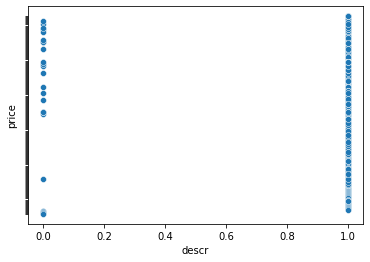

In [17]:
# Without description, the price raises. This is not logical, so we won't use it. Only 25 of the 923 records didn't have a description.
# data["description"].isnull().values.any()
# data["description"].isnull().sum()

withDescription = data[data['description'].isnull()==False]
withDescription['descr'] = 1
withoutDescription = data[data['description'].isnull()==True]
withoutDescription['descr'] = 0

descrip = pd.concat([withDescription, withoutDescription])

g = sns.scatterplot(x=descrip['descr'], y=descrip["price"])
g.set(yticklabels=[])  
plt.show()


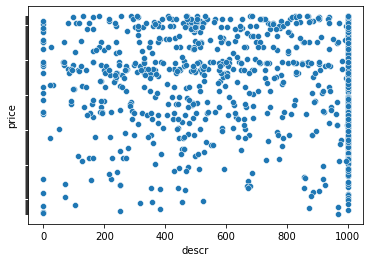

In [18]:
from sklearn.preprocessing import StandardScaler

descrLength = data
descrLength['descr'] = descrLength['description'].str.len()
descrLength['descr'] = descrLength['descr'].replace(np.nan, 0)
# descrLength['descr'] = descrLength['descr'].astype(int)
descrLength


g = sns.scatterplot(x=descrLength['descr'], y=descrLength["price"])
g.set(yticklabels=[])  
plt.show()


In [19]:
import ast

amenity = []
for x in data_cleaned['amenities']:
    x = ast.literal_eval(x)
    for y in range(0, len(x)):
        if x[y] not in amenity:
            amenity.append(x[y])


print(amenity)




['Microwave', 'Keypad', 'Extra pillows and blankets', 'Fire extinguisher', 'Dishes and silverware', 'Dedicated workspace', 'Paid parking off premises', 'Hot water', 'First aid kit', 'Carbon monoxide alarm', 'Patio or balcony', 'Shampoo', 'Private entrance', 'Wifi', 'Smoke alarm', 'Hangers', 'Iron', 'Coffee maker', 'Refrigerator', 'Outdoor furniture', 'Lock on bedroom door', 'Essentials', 'Washer', 'Long term stays allowed', 'Luggage dropoff allowed', 'TV with standard cable', 'Cooking basics', 'Bed linens', 'Dryer', 'Cable TV', 'Shower gel', 'Heating', 'Hair dryer', 'Dishwasher', 'Ethernet connection', 'Backyard', 'Babysitter recommendations', 'Gym', 'Children’s dinnerware', 'Conditioner', 'Freezer', 'Pack ’n Play/travel crib', 'TV', 'Kitchen', 'Body soap', 'Record player', 'Sound system', 'Single level home', 'Pocket wifi', 'Children’s books and toys', 'Room-darkening shades', 'Free street parking', 'Host greets you', 'Breakfast', 'Hot water kettle', 'marshall Bluetooth sound system',

In [20]:
# features = [
#     ['host_since'], 
#     ['host_location'],
#     ['host_is_superhost'],
#     ['host_listings_count'],
#     ['host_has_profile_pic'],
#     ['host_identity_verified'],
#     ['distance_to_center'],
#     ['accommodates'],
#     ['bathrooms'],
#     ['bedrooms'],
#     ['beds'],
#     ['availability_30'],
#     ['availability_60'],
#     ['availability_90'],
#     ['availability_365'],
#     ['number_of_reviews'],
#     ['number_of_reviews_ltm'],
#     ['number_of_reviews_l30d'],
#     ['review_scores_rating'],
#     ['review_scores_accuracy'],
#     ['review_scores_cleanliness'],
#     ['review_scores_checkin'],
#     ['review_scores_communication'],
#     ['review_scores_location'],
#     ['review_scores_value'],
#     ['room_type_entire'],
#     ['room_type_hotel'],
#     ['room_type_private'],
#     ['room_type_shared'],
#     ['instant_bookable']
# ]


# for col in features:
#     print(col, " ", data_cleaned[col].dtypes, "\n")


In [21]:
features = [
    'host_since', 
    # 'host_location',
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'distance_to_center',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'instant_bookable'
]

In [22]:
# We drop all the columns that we won't use
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'distance_to_center',
       'room_type_entire', 'room_type_hotel', 'room_type_private',
       'room_type_shared'],
      dtype='object')

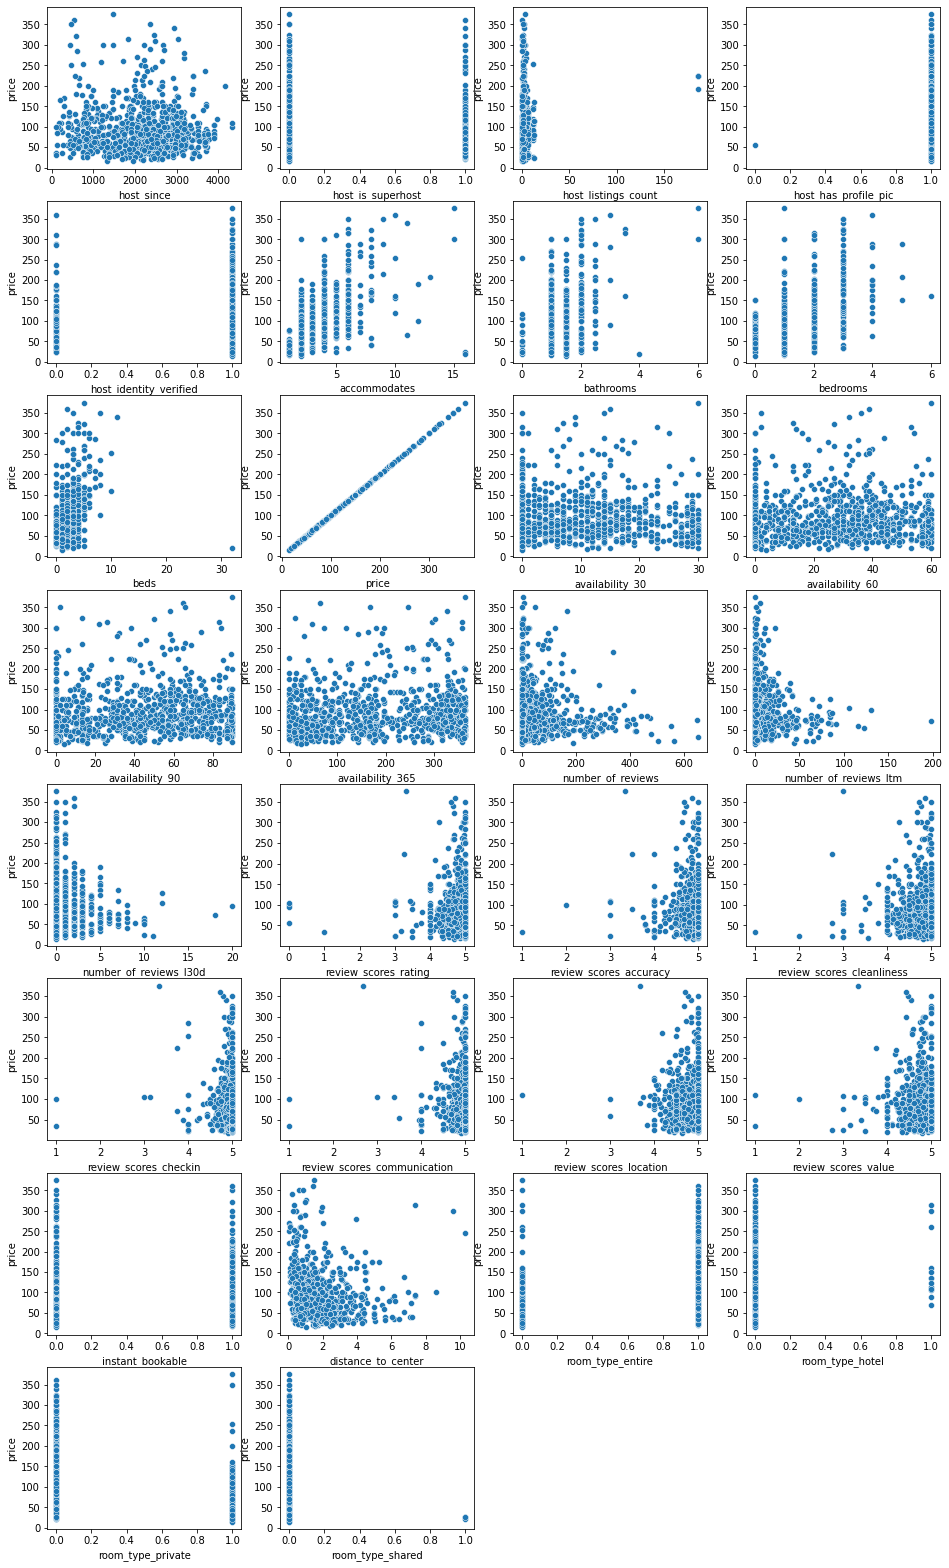

In [23]:
plt.figure(figsize=(16,28))
for i, k in enumerate(data_cleaned.keys()):
    plt.subplot(8, 4, 1+i)
    sns.scatterplot(x=data_cleaned[k], y=data_cleaned["price"])

C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

host_since                       int32
host_is_superhost                int32
host_listings_count              int32
host_has_profile_pic             int32
host_identity_verified           int32
accommodates                     int32
bathrooms                      float64
bedrooms                         int32
beds                             int32
price                          float64
availability_30                  int32
availability_60                  int32
availability_90                  int32
availability_365                 int32
number_of_reviews              float64
number_of_reviews_ltm            int32
number_of_reviews_l30d           int32
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int32
distance_to_center       

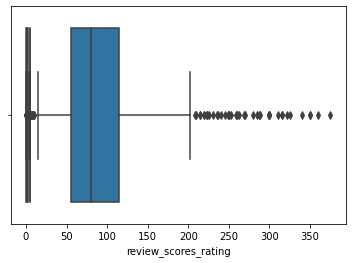

In [24]:
# plt.figure(figsize=(16,28))
# for i, k in enumerate(data_cleaned.keys()):
#     plt.subplot(8, 4, 1+i)
#     sns.boxplot(y=data_cleaned[k])

sns.boxplot(data_cleaned['price'])
sns.boxplot(data_cleaned['distance_to_center'])
sns.boxplot(data_cleaned['review_scores_rating'])
# sns.boxplot(data_cleaned['host_since'])

data_cleaned.dtypes


<AxesSubplot:>

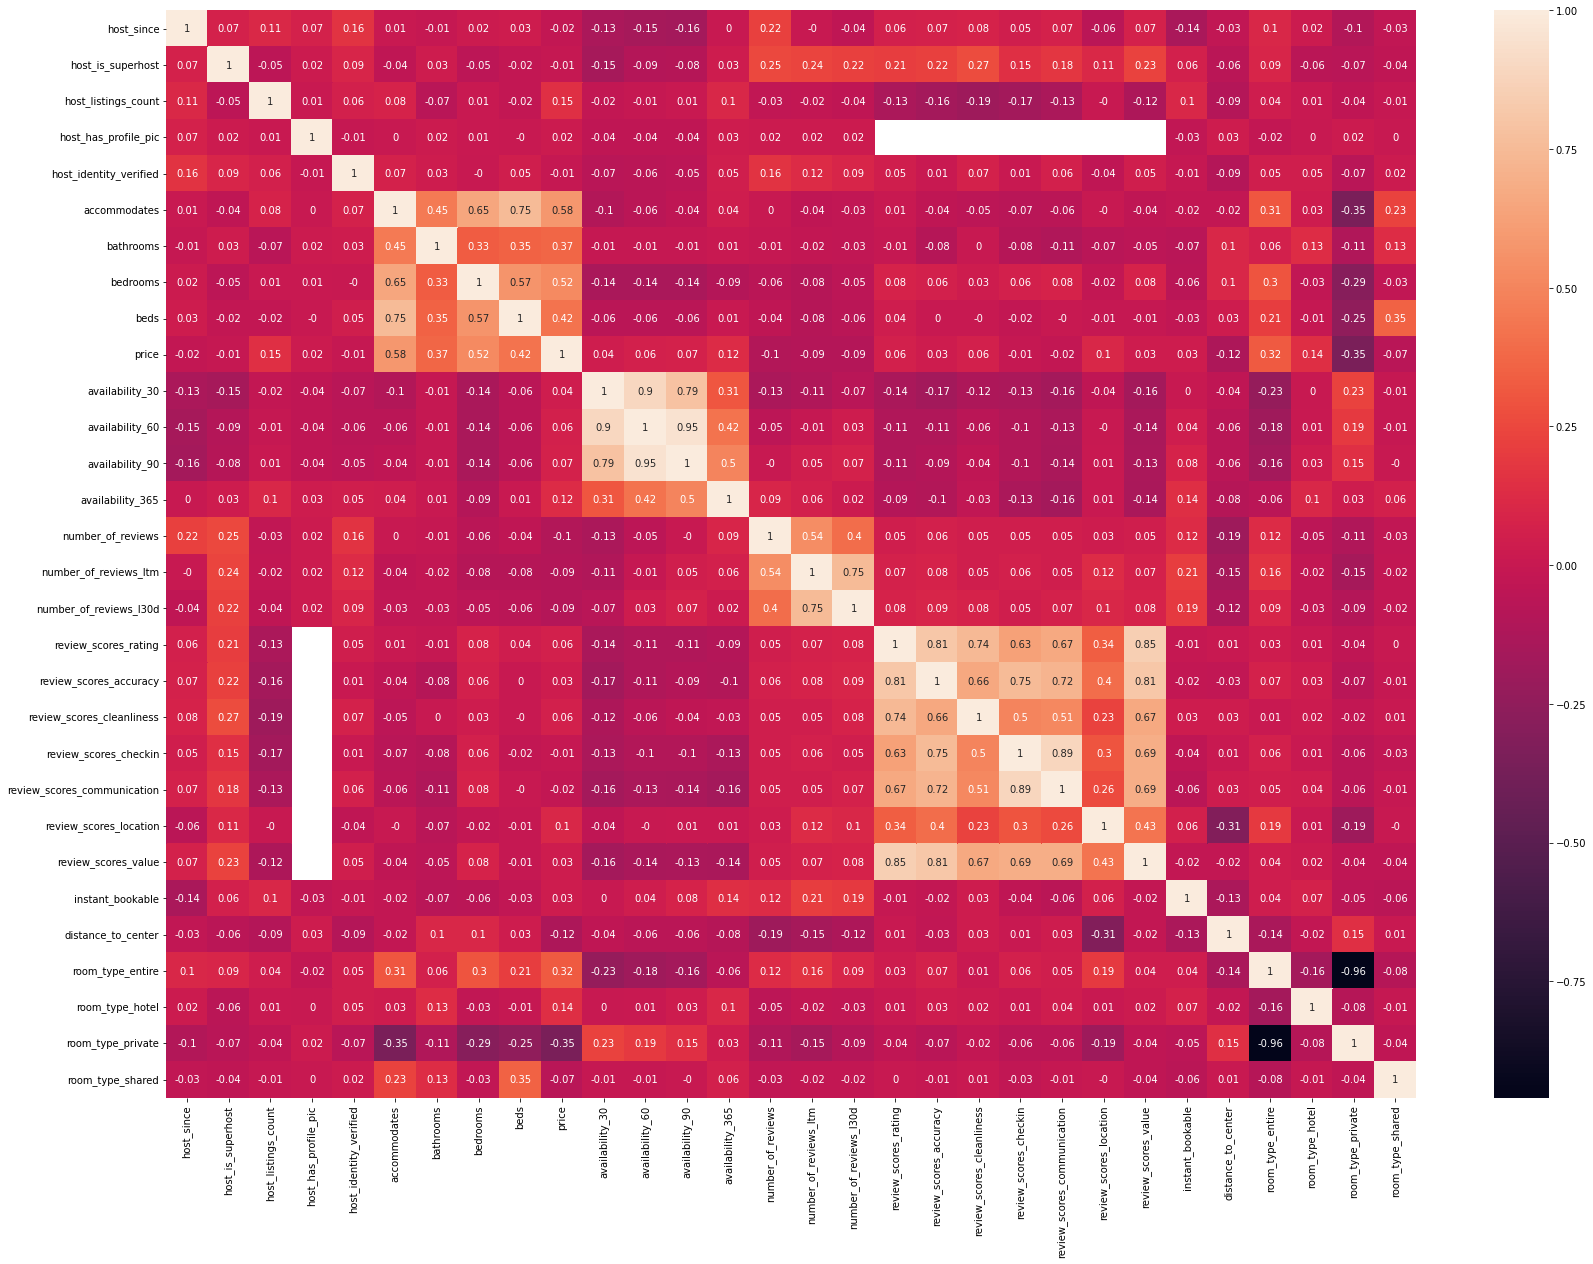

In [25]:
correlation_matrix = data_cleaned.corr().round(2)
plt.figure(figsize=(28,20))
sns.heatmap(data=correlation_matrix, annot=True)

This correlationmatrix gives us an indication of which factors have a correlation with the price. A positive correlation close to 1 means that the price behaves more or less directly proportional to that factor (the closer the correlation is to 1, the more this is true). A negative correlation close to -1 means the price will behave more or less inversly proportional to that factor (once again, a correlation closer to -1 means the price will behave more inversly proportional to that factor).

We will now make a decision tree based on these features. The tree will automatically choose the best feature for each division.  

In [26]:
# First we need to divide our data in a train- and testset
import sklearn.model_selection as model_selection

X = data_cleaned.drop(['price'], axis=1)
Y = data_cleaned['price']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)


In [27]:
import re
for feature in X_train.columns:
    if re.match("review_scores_*", feature):
        X_train = X_train.drop(feature, axis=1)
        X_test = X_test.drop(feature, axis=1)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

def visualize_results(predictions, ground_truth):
    
    plt.scatter(ground_truth, predictions, alpha=0.5)
    plt.xlabel("Ground truth price")
    plt.ylabel("Predicted price")
    plt.show()
    
    rmse = (np.sqrt(mean_squared_error(ground_truth, predictions)))
    r2 = r2_score(ground_truth, predictions)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [29]:
X_train.dtypes

host_since                  int32
host_is_superhost           int32
host_listings_count         int32
host_has_profile_pic        int32
host_identity_verified      int32
accommodates                int32
bathrooms                 float64
bedrooms                    int32
beds                        int32
availability_30             int32
availability_60             int32
availability_90             int32
availability_365            int32
number_of_reviews         float64
number_of_reviews_ltm       int32
number_of_reviews_l30d      int32
instant_bookable            int32
distance_to_center        float64
room_type_entire            uint8
room_type_hotel             uint8
room_type_private           uint8
room_type_shared            uint8
dtype: object

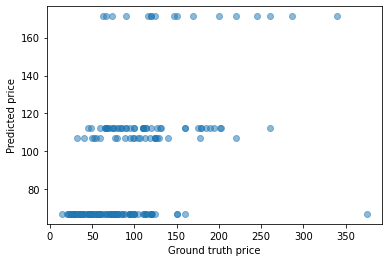

RMSE is 50.06379052889987
R2 score is 0.24827821138587447


In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(max_depth=2)
tree = tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

visualize_results(predictions, Y_test)

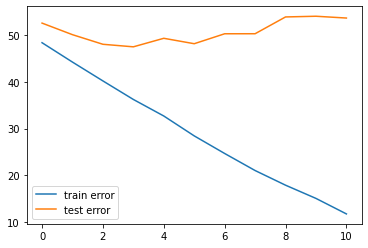

4 47.467974160466774


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

rmse_train = []
rmse_test = []

rmse_min = 1000
depth_min = 0

for depth in range(1, 12):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree = tree.fit(X_train, Y_train)
    
    predictions = tree.predict(X_train)
    rmse_train.append((np.sqrt(mean_squared_error(Y_train, predictions))))
    

    predictions = tree.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, predictions)))
    if rmse < rmse_min:
        depth_min = depth
        rmse_min = rmse
    rmse_test.append(rmse)
    
plt.plot(rmse_train, label="train error")
plt.plot(rmse_test, label="test error")
plt.legend()
plt.show()

model = DecisionTreeRegressor()
print(depth_min, rmse_min)

The plot above shows us that a tree with a depth higher than 6 isn't necessarily better. As you can see, a higher depth makes sure the train error decreases, but the test error stays quite the same, and even increases. This is because the model is overtrained, it gets used to the training data and shapes itself to much to that input. As a result, new data is difficult to work with. The code below shows an overview of the importance of each feature in our tree. As you can see, in our tree the accomodates of a listing is the most important factor for the price, followed by the number of bathrooms and the distance to the center of Ghent.

In [32]:
imp_feat=pd.Series(tree.feature_importances_,index=X_train.columns.tolist())
imp_feat.sort_values(ascending=False)

bedrooms                  0.283452
accommodates              0.141285
distance_to_center        0.125774
availability_365          0.072155
bathrooms                 0.068516
host_since                0.053041
number_of_reviews         0.048238
availability_90           0.043880
number_of_reviews_ltm     0.028849
availability_30           0.025860
room_type_private         0.023810
availability_60           0.022026
beds                      0.021427
number_of_reviews_l30d    0.013758
host_listings_count       0.013342
room_type_entire          0.005167
instant_bookable          0.003729
room_type_hotel           0.001992
host_is_superhost         0.001891
host_identity_verified    0.001809
host_has_profile_pic      0.000000
room_type_shared          0.000000
dtype: float64

In [33]:
data_cleaned.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'distance_to_center',
       'room_type_entire', 'room_type_hotel', 'room_type_private',
       'room_type_shared'],
      dtype='object')